<h2>ANÁLISIS EXPLORATORIO DE DATOS</h2>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Cargar el dataset
data = pd.read_csv('../data/raw/data.csv')

In [7]:
data.head()

,ID,EDAD,TRABAJO,ESTADO_CIVIL,EDUCACION,INCUMPLIMIENTO,VIVIENDA,PRESTAMO,TIPO_CONTACTO,MES,...,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,RESULT_PREVIO,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,ACEPTACION
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,1579.451319,12787.03798,3786.238571,0.0
1,2,57,services,married,high.school,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,1566.451319,31562.70242,4126.821231,0.0
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,1380.451319,14158.44577,8044.011661,0.0
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,1515.451319,25337.33537,1990.888552,0.0
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,1395.451319,24669.53116,3589.117251,0.0


In [8]:
# Obtener la cantidad de registros
data.size

907725

In [9]:
data.shape

(43225, 21)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43225 entries, 0 to 43224
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 43225 non-null  int64  
 1   EDAD               43225 non-null  int64  
 2   TRABAJO            43225 non-null  object 
 3   ESTADO_CIVIL       43225 non-null  object 
 4   EDUCACION          43225 non-null  object 
 5   INCUMPLIMIENTO     43225 non-null  object 
 6   VIVIENDA           43225 non-null  object 
 7   PRESTAMO           43225 non-null  object 
 8   TIPO_CONTACTO      43225 non-null  object 
 9   MES                43225 non-null  object 
 10  CAMPANA            43225 non-null  int64  
 11  NRO_DIAS_CONTACTO  43225 non-null  int64  
 12  CONTACTOS_PREVIOS  43225 non-null  int64  
 13  RESULT_PREVIO      43225 non-null  object 
 14  TASA_VAR_EMP       43225 non-null  float64
 15  IPC                43225 non-null  float64
 16  ICC                432

In [11]:
data.describe()

,ID,EDAD,CAMPANA,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,ACEPTACION
count,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,31478.000000
mean,20624.291082,40.340312,2.568768,962.357779,0.173117,0.080335,93.575422,-40.506885,3925.815770,19973.792760,4999.155850,0.112269
std,11874.527988,12.464779,2.767127,187.203068,0.495061,1.572550,0.579061,4.631636,3942.566319,8400.976456,2094.484715,0.315702
min,1.000000,5.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,1125.000000,6346.668502,1586.665139,0.000000
25%,10341.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1324.856644,12273.100800,3080.213596,0.000000
50%,20609.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,1496.180070,19952.741530,4995.250698,0.000000
75%,30903.000000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,7216.625640,27635.842350,6912.722257,0.000000
max,41188.000000,160.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,16463.000000,33653.594950,8413.229616,1.000000


In [12]:
data.isna().sum()

ID                       0
EDAD                     0
TRABAJO                  0
ESTADO_CIVIL             0
EDUCACION                0
INCUMPLIMIENTO           0
VIVIENDA                 0
PRESTAMO                 0
TIPO_CONTACTO            0
MES                      0
CAMPANA                  0
NRO_DIAS_CONTACTO        0
CONTACTOS_PREVIOS        0
RESULT_PREVIO            0
TASA_VAR_EMP             0
IPC                      0
ICC                      0
INGRESO                  0
MONTO_DEUDA              0
MONTO_TRANSAC            0
ACEPTACION           11747
dtype: int64

<h3>EXPLORACIÓN DE VARIABLES CATEGÓRICAS</h3>

VARIABLE: TRABAJO

In [50]:
data["TRABAJO"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [51]:
print(f"TRABAJO (n): {len(data[data['TRABAJO'] == 'unknown'])}")
print(f"TRABAJO (%): {round(len(data[data['TRABAJO'] == 'unknown']) / len(data) * 100, 2)}%")

TRABAJO (n): 344
TRABAJO (%): 0.8%


VARIABLE: ESTADO_CIVIL

In [52]:
data["ESTADO_CIVIL"].unique()

array(['married', 'single', 'divorced', 'unknown', ' married',
       'divorced ', 'marrid', 'singgle ', 'd_ivorced', 'single '],
      dtype=object)

In [53]:
# Estandarizar variables
data.loc[data["ESTADO_CIVIL"].isin(["marrid"," married"]),"ESTADO_CIVIL"] = "married"
data.loc[data["ESTADO_CIVIL"].isin(["d_ivorced","divorced "]),"ESTADO_CIVIL"] = "divorced"
data.loc[data["ESTADO_CIVIL"].isin(["singgle ","single "]),"ESTADO_CIVIL"] = "single"

In [54]:
data["ESTADO_CIVIL"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [56]:
print(f"ESTADO_CIVIL (n): {len(data[data['ESTADO_CIVIL'] == 'unknown'])}")
print(f"ESTADO_CIVIL (%): {round(len(data[data['ESTADO_CIVIL'] == 'unknown']) / len(data) * 100, 2)}%")

ESTADO_CIVIL (n): 84
ESTADO_CIVIL (%): 0.19%


VARIABLE: EDUCACIÓN

In [57]:
data["EDUCACION"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [58]:
print(f"EDUCACION (n): {len(data[data['EDUCACION'] == 'unknown'])}")
print(f"EDUCACION (%): {round(len(data[data['EDUCACION'] == 'unknown']) / len(data) * 100, 2)}%")

EDUCACION (n): 1811
EDUCACION (%): 4.19%


VARIABLE: INCUMPLIMIENTO

In [59]:
data["INCUMPLIMIENTO"].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [60]:
print(f"INCUMPLIMIENTO (n): {len(data[data['INCUMPLIMIENTO'] == 'unknown'])}")
print(f"INCUMPLIMIENTO (%): {round(len(data[data['INCUMPLIMIENTO'] == 'unknown']) / len(data) * 100, 2)}%")

INCUMPLIMIENTO (n): 9039
INCUMPLIMIENTO (%): 20.91%


VARIABLE: VIVIENDA

In [61]:
data["VIVIENDA"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [62]:
print(f"VIVIENDA (n): {len(data[data['VIVIENDA'] == 'unknown'])}")
print(f"VIVIENDA (%): {round(len(data[data['VIVIENDA'] == 'unknown']) / len(data) * 100, 2)}%")

VIVIENDA (n): 1036
VIVIENDA (%): 2.4%


VARIABLE: PRESTAMO

In [63]:
data["PRESTAMO"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [64]:
print(f"PRESTAMO (n): {len(data[data['PRESTAMO'] == 'unknown'])}")
print(f"PRESTAMO (%): {round(len(data[data['PRESTAMO'] == 'unknown']) / len(data) * 100, 2)}%")

PRESTAMO (n): 1036
PRESTAMO (%): 2.4%


VARIABLE: TIPO_CONTACTO

In [65]:
data["TIPO_CONTACTO"].unique()

array(['telephone', 'cellular'], dtype=object)

VARIABLE: MES

In [66]:
data["MES"].unique()

array(['may', 'jun', 'sep', 'oct', 'aug', 'nov', 'dec', 'mar', 'apr',
       'jul'], dtype=object)

VARIABLE: RESULT_PREVIO

In [67]:
data["RESULT_PREVIO"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

<h3>EXPLORACIÓN DE VARIABLES NUMÉRICAS</h3>

VARIABLE: EDAD

In [15]:
data["EDAD"].unique()

array([ 56,  57,  37,  40,  45,  59,  41,  24,  25,  29,  35,  54,  46,
        50,  39,  30,  55,  49,  34,  52,  58,  32,  38,  44,  42,  60,
        53,  47,  51,  48,  33,  31,  43,  36,  28,  27, 121,  26,  22,
       141,  23,   6,   8,   5,   7, 131, 150,  20, 130, 129, 155, 136,
        14, 156, 154,  13, 135,  12, 123,  21, 140,  10,  11, 145, 151,
       149, 138, 124, 122, 134, 147, 157, 125, 132,  61,   9, 137, 139,
       128, 142, 127, 120, 143, 133, 153, 159, 160, 144,  19, 158, 148,
       126,  18, 152,  70,  66,  76,  67,  73,  80,  68,  75,  63,  62,
        65,  72,  64,  71,  69,  78,  79,  77, 146,  74], dtype=int64)

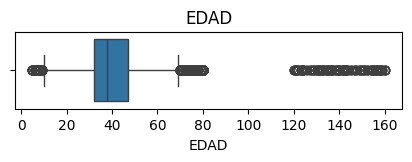

In [13]:
plt.figure(figsize=(5,1))
plt.title('EDAD')
sns.boxplot(x=data['EDAD']);

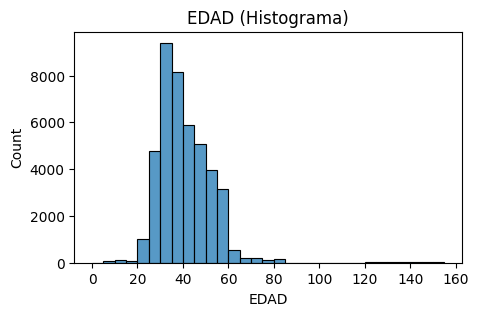

In [18]:
plt.figure(figsize=(5,3))
sns.histplot(data['EDAD'], bins=range(0,160,5))
plt.title('EDAD (Histograma)');

In [19]:
print(f"Edad (n): {data['EDAD'][(data['EDAD'] < 18) | (data['EDAD'] > 75)].count()}")
print(f"Edad (%): {round(data['EDAD'][(data['EDAD'] < 18) | (data['EDAD'] > 75)].count() / len(data) * 100, 2)}%")

Edad (n): 640
Edad (%): 1.48%


VARIABLE: CAMAPANA

In [20]:
data["CAMPANA"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

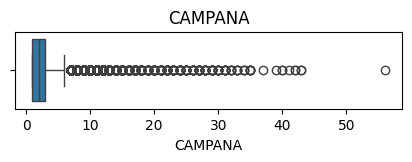

In [77]:
plt.figure(figsize=(5,1))
plt.title('CAMPANA')
sns.boxplot(x=data['CAMPANA']);

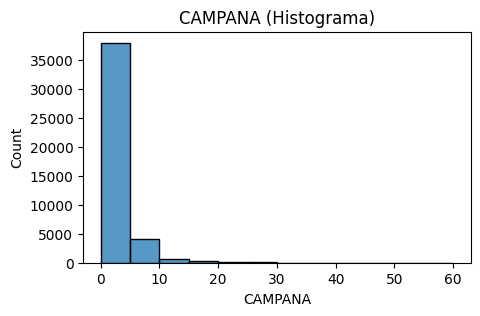

In [88]:
plt.figure(figsize=(5,3))
sns.histplot(data['CAMPANA'], bins=range(0,61,5))
plt.title('CAMPANA (Histograma)');

VARIABLE: NRO_DIAS_CONTACTO

In [22]:
data["NRO_DIAS_CONTACTO"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

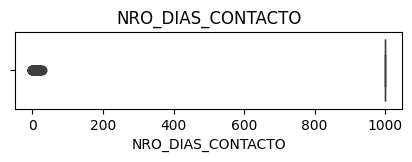

In [78]:
plt.figure(figsize=(5,1))
plt.title('NRO_DIAS_CONTACTO')
sns.boxplot(x=data['NRO_DIAS_CONTACTO']);

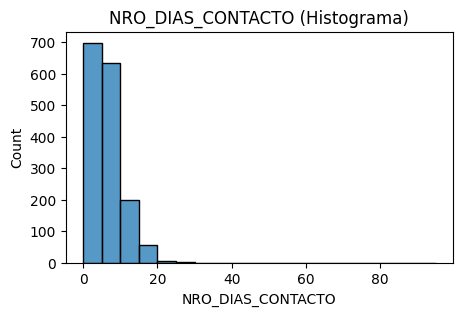

In [21]:
plt.figure(figsize=(5,3))
sns.histplot(data['NRO_DIAS_CONTACTO'], bins=range(0,100,5))
plt.title('NRO_DIAS_CONTACTO (Histograma)');

VARIABLE: CONTACTOS_PREVIOS

In [23]:
data["CONTACTOS_PREVIOS"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

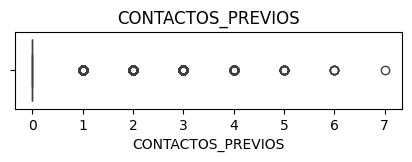

In [24]:
plt.figure(figsize=(5,1))
plt.title('CONTACTOS_PREVIOS')
sns.boxplot(x=data['CONTACTOS_PREVIOS']);

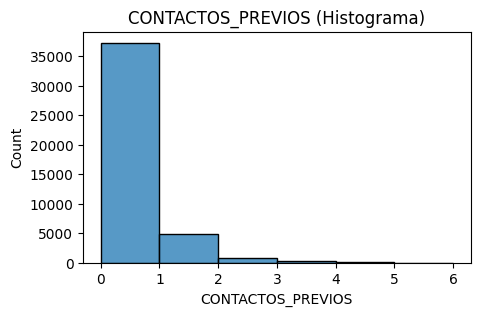

In [25]:
plt.figure(figsize=(5,3))
sns.histplot(data['CONTACTOS_PREVIOS'], bins=range(0,7,1))
plt.title('CONTACTOS_PREVIOS (Histograma)');

VARIABLE: TASA_VAR_EMP

In [26]:
data["TASA_VAR_EMP"].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

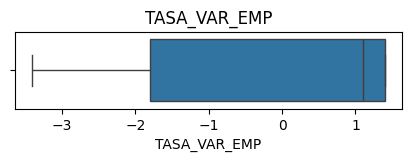

In [27]:
plt.figure(figsize=(5,1))
plt.title('TASA_VAR_EMP')
sns.boxplot(x=data['TASA_VAR_EMP']);

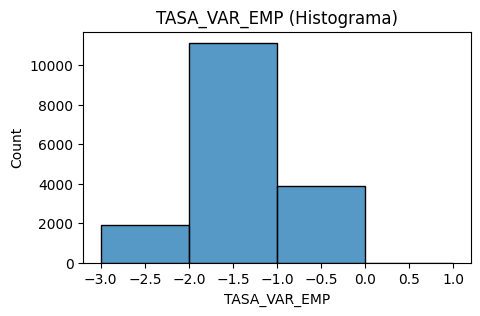

In [28]:
plt.figure(figsize=(5,3))
sns.histplot(data['TASA_VAR_EMP'], bins=range(-3,2,1))
plt.title('TASA_VAR_EMP (Histograma)');

VARIABLE: IPC

In [29]:
data["IPC"].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

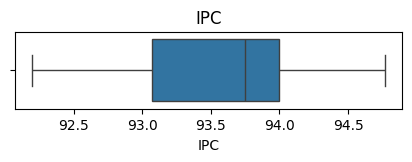

In [30]:
plt.figure(figsize=(5,1))
plt.title('IPC')
sns.boxplot(x=data['IPC']);

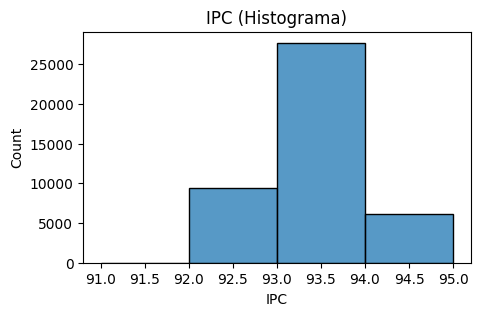

In [34]:
plt.figure(figsize=(5,3))
sns.histplot(data['IPC'], bins=range(91,96,1))
plt.title('IPC (Histograma)');

VARIABLE: ICC

In [35]:
data["ICC"].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

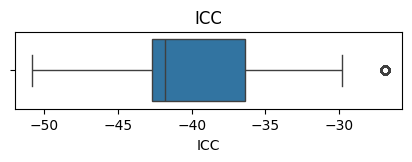

In [36]:
plt.figure(figsize=(5,1))
plt.title('ICC')
sns.boxplot(x=data['ICC']);

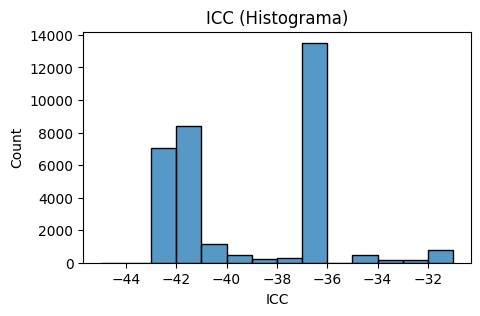

In [38]:
plt.figure(figsize=(5,3))
sns.histplot(data['ICC'], bins=range(-45,-30,1))
plt.title('ICC (Histograma)');

VARIABLE: INGRESO

In [39]:
data["INGRESO"].unique()

array([1579.451319, 1566.451319, 1380.451319, ..., 9575.655994,
       9691.655994, 9652.655994])

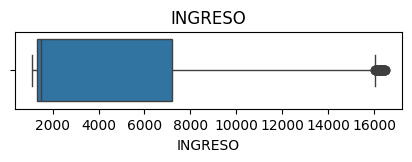

In [40]:
plt.figure(figsize=(5,1))
plt.title('INGRESO')
sns.boxplot(x=data['INGRESO']);

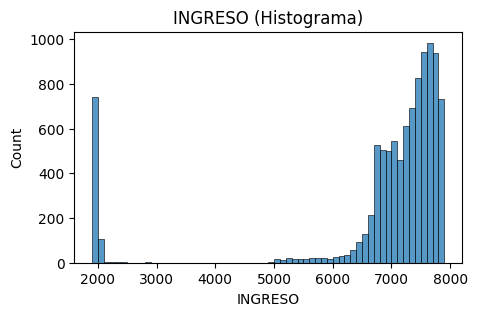

In [41]:
plt.figure(figsize=(5,3))
sns.histplot(data['INGRESO'], bins=range(1900,8000,100))
plt.title('INGRESO (Histograma)');

VARIABLE: MONTO_DEUDA

In [42]:
data["MONTO_DEUDA"].unique()

array([12787.03798 , 31562.70242 , 14158.44577 , ..., 24118.59408 ,
        7862.625518, 30005.46113 ])

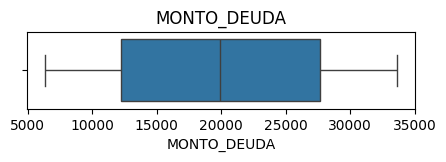

In [43]:
plt.figure(figsize=(5,1))
plt.title('MONTO_DEUDA')
sns.boxplot(x=data['MONTO_DEUDA']);

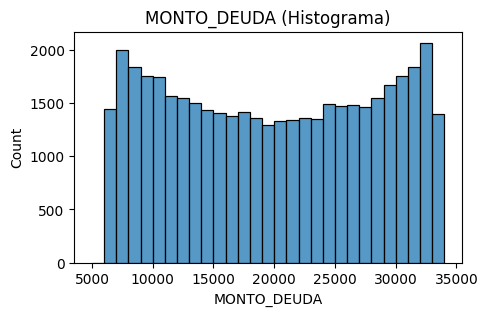

In [44]:
plt.figure(figsize=(5,3))
sns.histplot(data['MONTO_DEUDA'], bins=range(5000,35000,1000))
plt.title('MONTO_DEUDA (Histograma)');

VARIABLE: MONTO_TRANSAC

In [45]:
data["MONTO_TRANSAC"].unique()

array([3786.238571, 4126.821231, 8044.011661, ..., 4921.860345,
       1959.379315, 8179.054127])

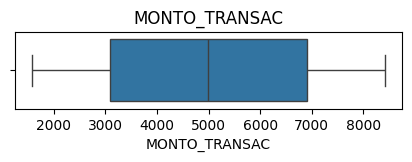

In [46]:
plt.figure(figsize=(5,1))
plt.title('MONTO_TRANSAC')
sns.boxplot(x=data['MONTO_TRANSAC']);

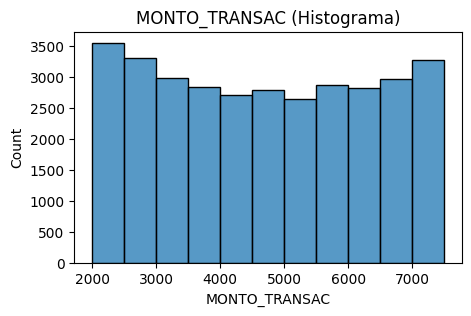

In [49]:
plt.figure(figsize=(5,3))
sns.histplot(data['MONTO_TRANSAC'], bins=range(2000,8000,500))
plt.title('MONTO_TRANSAC (Histograma)');

<h3>EXPLORACION DE LA VARIABLE TARGET</h3>

In [68]:
data["ACEPTACION"].unique()

array([ 0., nan,  1.])

In [69]:
# Convertir la variable
data['ACEPTACION'] = data['ACEPTACION'].map({0: 'RECHAZO',1: 'ACEPTACIÓN'})

In [70]:
data['ACEPTACION'].value_counts()

ACEPTACION
RECHAZO       27944
ACEPTACIÓN     3534
Name: count, dtype: int64

In [71]:
rechazo = data[data['ACEPTACION'] == 'RECHAZO']
aceptacion = data[data['ACEPTACION'] == 'ACEPTACIÓN']

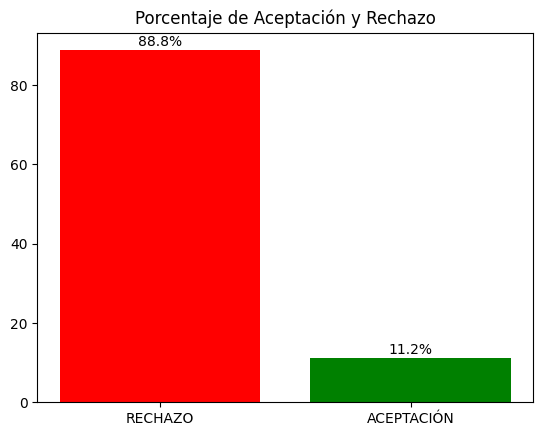

In [72]:
# Calcular los porcentajes
porcentajes = data['ACEPTACION'].value_counts(normalize=True) * 100

# Crear el gráfico de barras
plt.title('Porcentaje de Aceptación y Rechazo')
plt.bar(porcentajes.index, porcentajes.values, color=['red', 'green'])

for index, value in enumerate(porcentajes.values):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center')

plt.show()

In [105]:
count_cols = ['EDAD',
              'CAMPANA',
              'NRO_DIAS_CONTACTO',
              'INGRESO'
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, EDAD: 1141
Number of outliers, CAMPANA: 3574
Number of outliers, NRO_DIAS_CONTACTO: 0
Number of outliers, INGRESO: 4025
